# Traditional methods for ML in Graphs

The traditional ML pipeline for graph is designing features (by hand) from data which describe how a given node is positioned in the graph, its local topology, and significance. These tasks can be generalised to "Given $G=(V,E)$, learn a function $f:V\rightarrow\mathbb{R}$, $f:E\rightarrow\mathbb{R}$, or $f:G\rightarrow\mathbb{R}$"

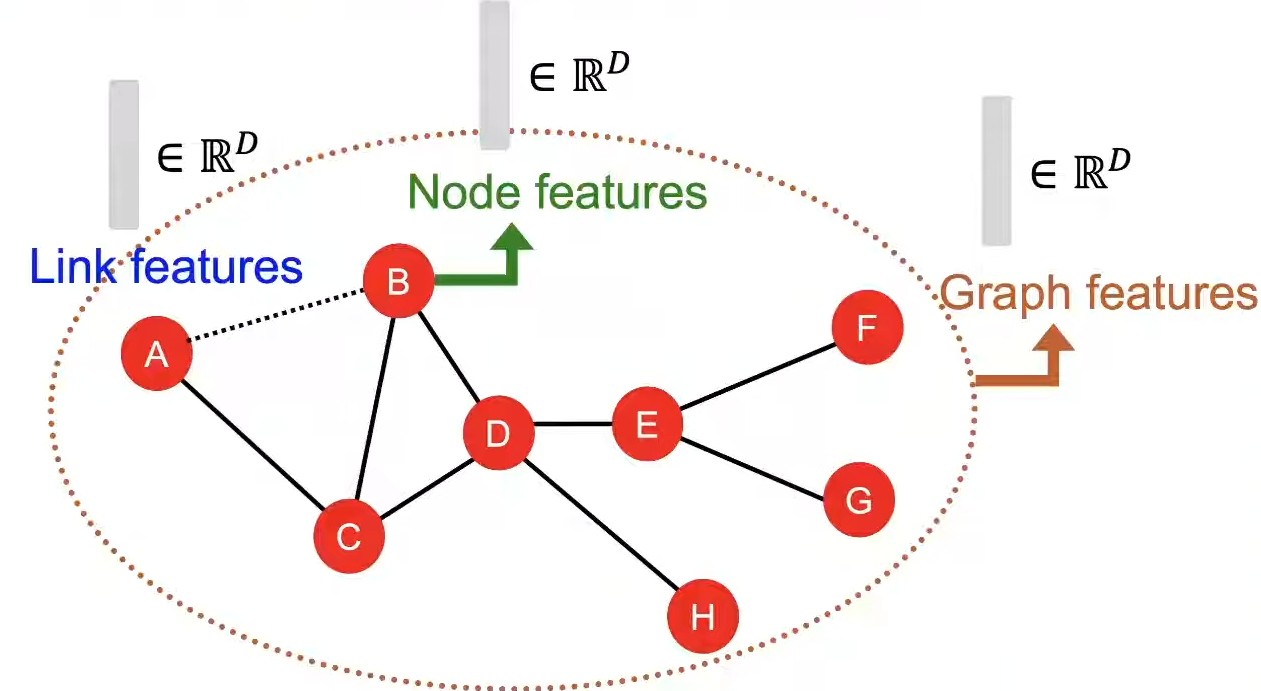

## Node Level Tasks
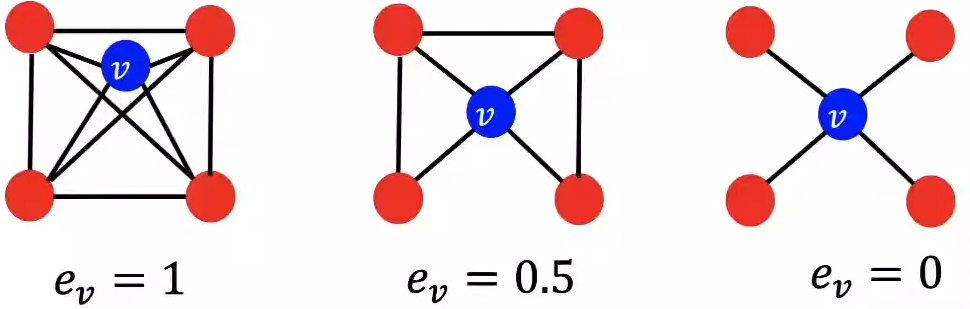

For creating node-level features, the overall task can be thought of as a semi-supervised method where the grey nodes need to be coloured in; and so the goal is to characterize the structure and position of a node in a network to aid in this task.

### Node degree
The simplest feature to design is the number of edges each node has, $d$, capturing the number of neighbours each node has treating each neighbour equally (nodes with equal degree are indistinguishable even if at opposite sides of the network).
### Node Centrality
This feature type attempts to capture the "importance" $c_v$ of a given node $v$ to its graph:
#### Egienvector Centrality
In here, "importance" of a node $v$ is defined by the importance of the neighbouring nodes $u\in N(v)$. This idea can be written as $c_v=\frac{1}{\lambda}\sum_{u\in N(v)}c_u$ for some positive constant $\lambda$, which can be clearly represented in marix form as $\lambda c=Ac$ where $A$ is the adjacency matrix ($A_{uv}=1$ if $u\in N(v)$), and $c$ is the centrality vector ($1\times |V|$ vector) whose $i^{th}$ element corresponds to node $i$'s importance, $c_i$. In this form it can be seen that this is an eigenvector eigenvalue equation
- Perron-Frobenius theorem of linear algebra says that, for every irreducible non-negative matrix, its largest eigenvalue ($\lambda_{max}$) is positive, and the components of the corresponding eigenvector ($c_{max}$) are also all positive.Therefore, for any strongly connected directed network (needs only to be connected if undirected), the centrality vector is well-defined.

    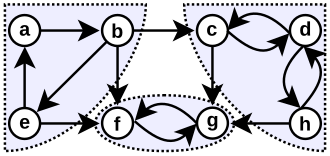 (strongly connected components of a graph)

#### Betweennes Centrality
A different interpretation of "importance", where a node is important if it lies on many **shortest paths** between other nodes (if it is a transit point or big point of failure):$$c_v=\sum_{s\neq v\neq t}\frac{\#(\text{shortest paths between }s\text{ and }t\text{ that contain }v)}{\#(\text{shortest paths between }s\text{ and }t)}$$

#### Closeness Centrality
Similar to betweenness, this feature captures the "importance" of a node based on the length of the sortest paths from itself to all other nodes (if it is close to everyone else):$$c_v=\sum_{u\neq v}\frac{1}{\text{shortest path between }u\text{ and }v}$$
#### Clustering Coefficient
This measure of centrality, instead of looking at the node itself, measures how connected $v$'s neighbouring nodes are to each-other:$$e_v=\frac{\#(\text{edges among neighbouring nodes})}{\binom{d_v}{2}}$$
<table><tr><td>

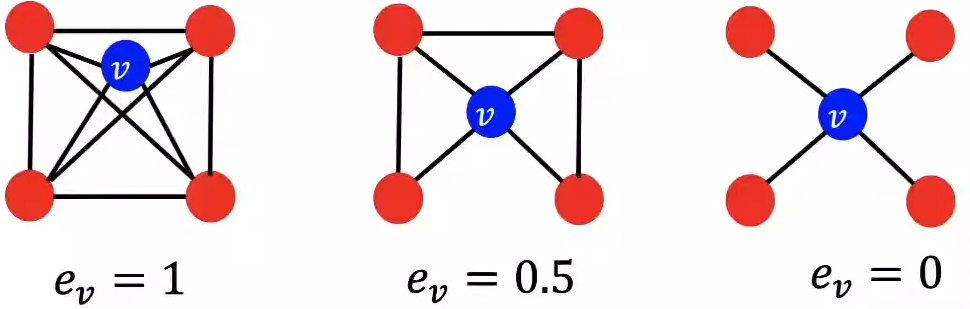

(example of clustering coefficients)
</td><td>

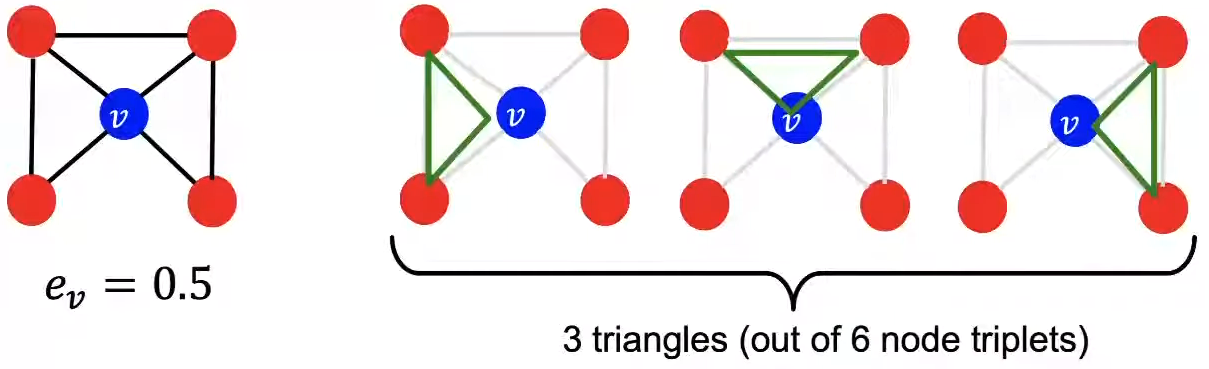

This can be thought of as counting the number of triangles in the *ego-network* (the subnetwork consisting of the given node and its neighbours)
</td></tr></table>

##### Graphlets
Generalising the observation made about the clustering coefficient to instead of looking only at triangles but expand it to **rooted connected non-isomorphic subgraphs**, also known as *graphlets*: (numbered nodes are the **node of interest**) 

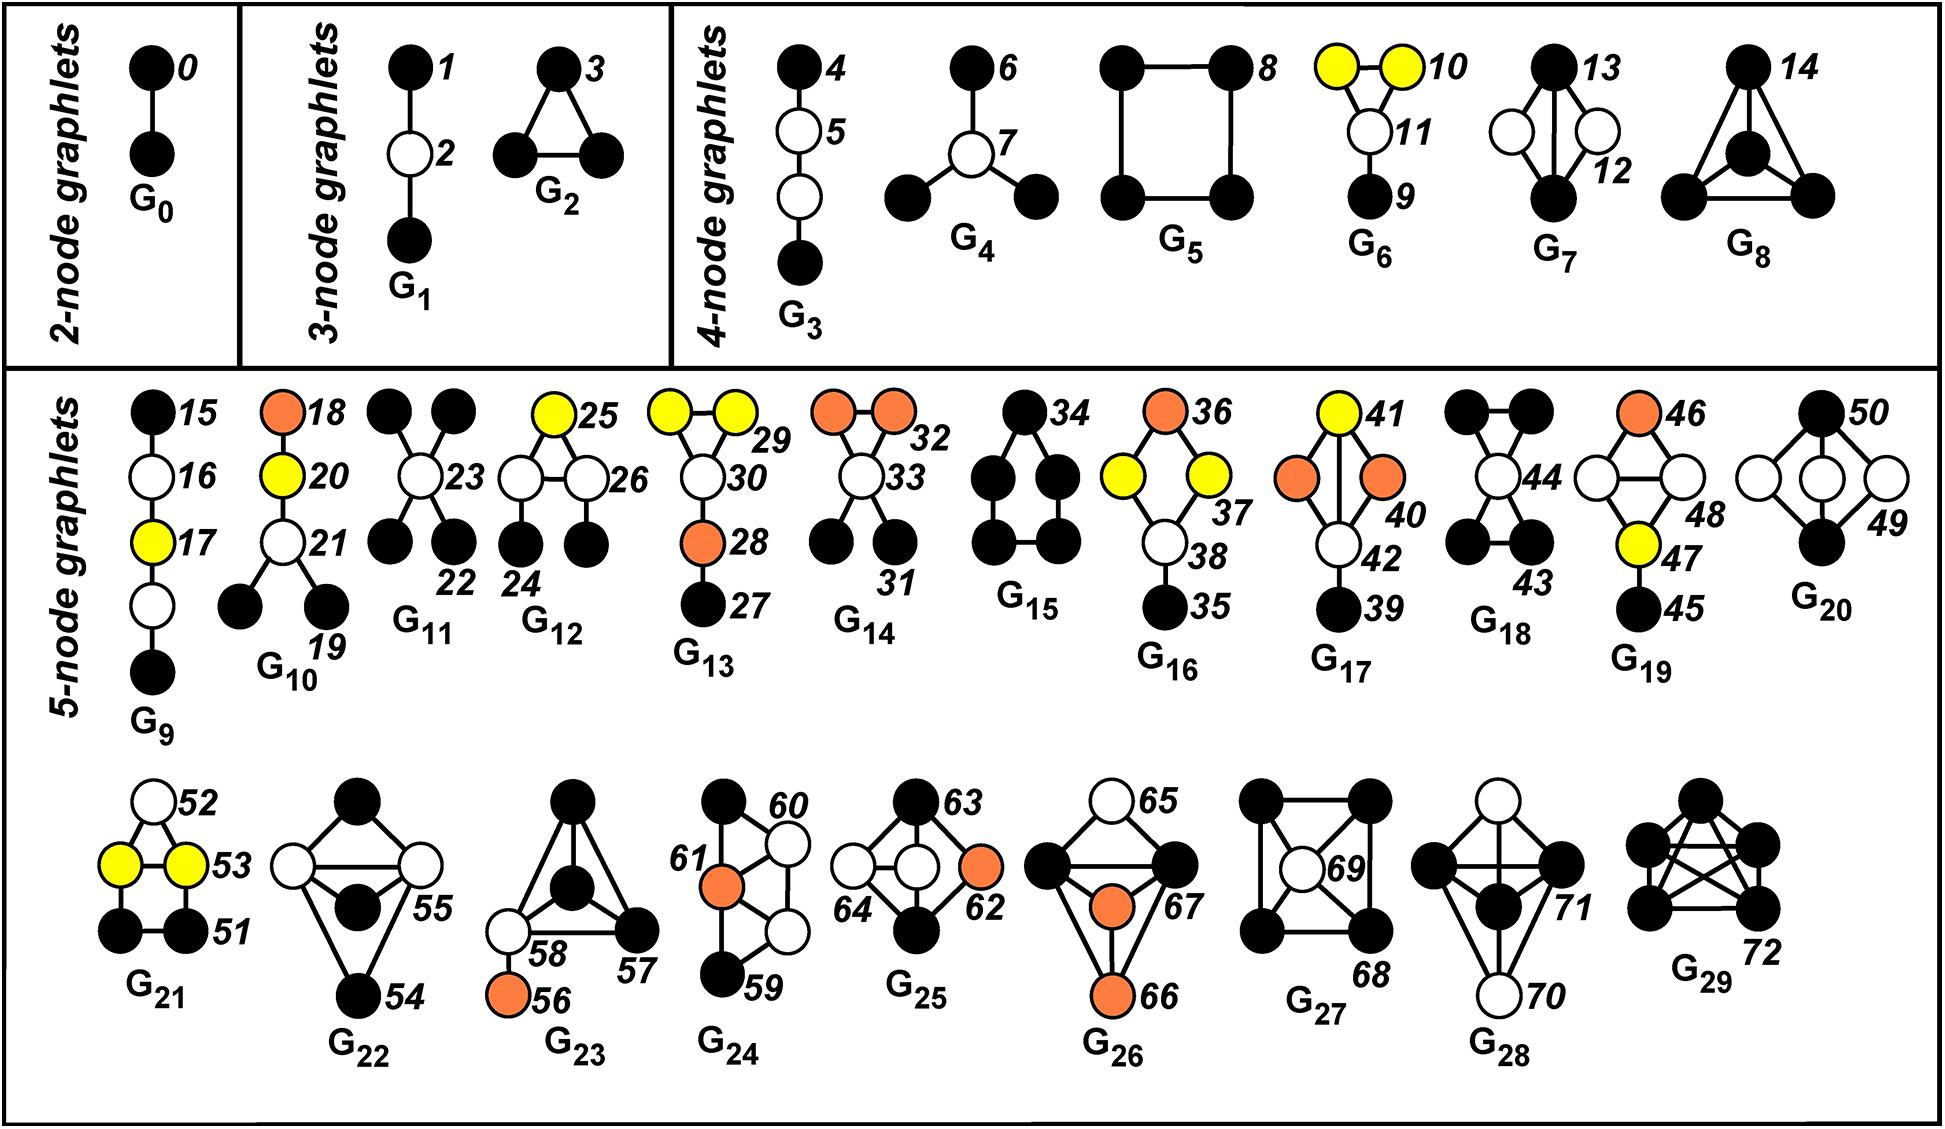

Using these, a **Graphlet Degree Vector** (GDV) can be generated for every node, where the $i^{th}$ element is the number of graphlets the node participates in as the *node of interest* $i$. This then provides a more detailed measure of local topology of the graph (more computationally intensive).

## Edge Level Tasks
For creating edge-level features, the overall task can be thought of predicting new links based on existing ones; at test time all node pairs are ranked and the top $K$ links are predicted. The goal is then to design features for a pair of nodes which has 2 main formulations:
1. remove a random set of links and then aim to predict them back.
2. given a graph of edges up to time $t_0'$, $G[t_0,t_0']$, output a ranked list $L$ of links not in $G[t_0,t_0']$ that are predicted to appear in $G[t_1,t_1']$. This can be evaluated by taking the top $n=|E_{new}|$ (number of edges that appear during the period $[t_1,t_1']$) of $L$ and count the number of correctly predcted edges.

The methodology will then be that for each pair of nodes $(x,y)$ a score $c(x,y)$ will be computed and sorted in decreasing order, with the top $n$ pair predicted as the new links and tested against $G[t_1,t_1']$

### Distance-based Features
The simplest of these features is capturing the sortest-path distance between node $u$ and $v$. However, this does not record "**neighbourhood overlap**", where 2 are not "close" to each other but their neighbourhood is very connected,
### Local neighbourhood Features
This class of features attempts to fix distance-based features' shortcomings by capturing the number of neighbouring nodes shared between nodes $v_1$ and $v_2$, thereby calculate the degree of neighbourhood overlap:

<table><tr><td>

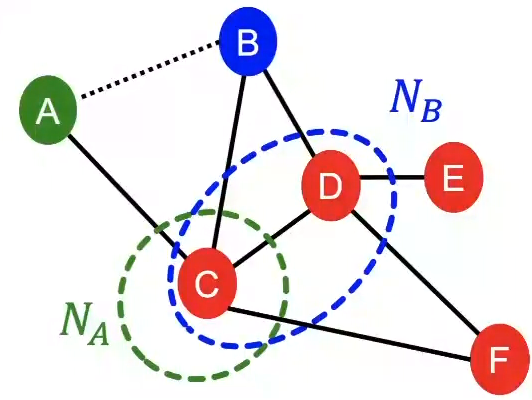
</td><td>

#### Common Neighbours
$$|N(v_1)\cap N(v_2)|$$
#### Jaccard's Coefficient
$$\frac{|N(v_1)\cap N(v_2)|}{|N(v_1)\cup N(v_2)|}$$
attempts to normalise *common neighbours*
#### Adamic-Adar Index
$$\sum_{u\in N(v_1)\cap N(v_2)}\frac{1}{\log{d_u}}$$
</td></tr></table>
The limit with this is that it is always 0 is the two nodes do not have any neighbours in common, even if the nodes may still potentially be connected in the future. 

### Global neighbourhood Features
This feature resolves the limitation introduced by local neighbourhood features by considering the entire graph. This can be achieved using **Kantz Index**.

Adjancency matrix $A$ has $A_{uv}=1$ if $u\in N(v)$ and so can be thought of as the number of paths between the nodes of length 1 (direct neighbourhood), $P_{uv}^{(1)}$. Therefore, $P_{uv}^{(k)}=\sum_i A_{ui}P_{iv}^{(k-1)}=A_{ui}A_{iv}^{k-1}=A_{uv}^k$.

Kantz Index, $s_{v_1v_2}=\sum_{l=1}^\infty\beta^lA_{v_1v_2}^l,\;0<\beta<1$ (discount factor), then counts the number of paths of all lengths between a pair of nodes; applying a bias towards shorter paths due to the discount factor. This has a closed form ($\sum_{i=0}^\infty\beta^iA^i=(I-\beta A)^{-1}$ by geometric series of matrices) $$S=\sum_{i=1}^\infty\beta^iA^i=(I-\beta A)^{-1}-I$$

### Kernels
Basic function $\phi(x)$ are used to create new input features from the original features $x$, thus allowing basic models to become more versatile and flexible. The input transformation is first applied to the input (pre-processing step), and is therefore used when training, evaluating, and using the model (instead of the original input).

$$X=\underbrace{\left[{\begin{array}{cc} x_1^T \\ x_2^T \\ \vdots \\ x_n^T \end{array}}\right]}_{n\times p+1}\rightarrow \Phi(X)=\underbrace{\left[{\begin{array}{cc} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_n)^T \end{array}}\right]}_{n\times d}$$

Creating $\phi(x)$ to contain a lot of information that could possibly be of interest for most problems leads to the idea of choosing $d\rightarrow\infty$ and combine it with regularisation. While $\phi(x)$ is not fixed to anything specific, $d>>n$ and as a resul $d$ parameters are required to be learned in training. Where $\hat\theta$ would be calculated and stored, this is not possible where $d\rightarrow\infty$; and therefore reformulations of models must be done such that no computations or storage demands scale with $d$.

This is possible for many modes such as linear regression with $L^2$-regularisation:
$$\hat\theta=\text{arg}\min_\theta\frac{1}{n}\sum_{i=1}^n(\underbrace{\theta^T\phi(x_i)}_{\hat{y}_i}-y_i)^2+\lambda||\theta||_2^2\rightarrow (\Phi(X)^T\Phi(X)+n\lambda I)^{-1}\Phi(X)^Ty$$
$$\therefore \hat{y}(x_*)=\underbrace{\hat\theta^T}_{1\times d}\underbrace{\phi(x_*)}_{d\times 1} = [(\Phi(X)^T\Phi(X)+n\lambda I)^{-1}\Phi(X)^Ty]^T\phi(x_*)$$
$$=\underbrace{y^T}_{1\times n}\underbrace{\underbrace{\Phi(X)}_{n\times d}\underbrace{(\Phi(X)^T\Phi(X)+n\lambda I)^{-1}}_{d\times d}\underbrace{\phi(x_*)}_{d\times 1}}_{n\times 1}$$
using push-through matrix identity $A(A^TA+I)^{-1}=(AA^T+I)^{-1}A$:
$$=\underbrace{y^T}_{1\times n}\underbrace{(\Phi(X)\Phi(X)^T+n\lambda I)^{-1}}_{n\times n}\underbrace{\Phi(X)\phi(x_*)}_{n\times 1}$$
$$(\Phi(X)\Phi(X)^T=\left[{\begin{array}{cc} \phi(x_1)^T\phi(x_1) & \phi(x_1)^T\phi(x_2) & \cdots & \phi(x_1)^T\phi(x_n) \\ \phi(x_2)^T\phi(x_1) & \phi(x_2)^T\phi(x_2) & \cdots & \phi(x_2)^T\phi(x_n) \\ \vdots & \vdots & \ddots & \vdots \\ \phi(x_1)^T\phi(x_n) & \phi(x_n)^T\phi(x_2) & \cdots & \phi(x_n)^T\phi(x_n) \end{array}}\right], \Phi(X)\phi(x_*)=\left[{\begin{array}{cc} \phi(x_1)^T\phi(x_*) \\ \phi(x_2)^T\phi(x_*) \\ \vdots \\ \phi(x_n)^T\phi(x_*) \end{array}}\right]$$

This now means that $\hat{y}(x_*)$ can be computed without having to deal with any $d$-dimensional vectors/matrices provided that the matrix multiplications $\Phi(X)\Phi(X)^T$ and $\Phi(X)\phi(x_*)$ can be computed. Therefore, if the inner product $\phi(x)^T\phi(x')$ can be directly computed, without first explicitly computing the $d$-dimensional $\phi(x)$ then the above calculations can be easily computed.
- it can be generally shown that if $\phi(x)$ is a suitably re-scaled polynomial of order $d-1$ (3rd order $\phi(x)=[1\;\sqrt{3}x\;\sqrt{3}x^2\;x^3]$), then $\phi(x)^T\phi(x')=(1+xx')^{d-1}$

Generalizing this, a kernel $k(x,x')$ is any function that takes 2 arguments form the same feature space and returns a scalar value (inner product of 2 non-linear input transformations is an example of a kernel), where a kernel matrix $K(X,X')$ must always be positive semidefine (positive eigenvalues). Once such a kernel is defined, off-theshelf ML models (such as kernel SVM) can be used to make predictions.

## Graph Level Tasks
For graph-level feature, the entire graph structure needs to be characterized with the most widely-used traditional method for it being Kernel based; therefore the idea is to design a kernel instead of a feature vector (like in node and edge level).

### Graph Kernels
The key idea of designing graph feature verctor $\phi(G)$ is using similar ideas to a Bag-of-Words (GoW) but for a graph. BoW simply uses the word count as a feature for documents (no ordering considered) and so a naive extension of this would be to regard nodes degrees as words. This however would not work as graphs wiht the same number of nodes but different relations would be considered as similar. Therefore, a more complex version of Bag-of-* needs to be used:
#### Graphlet Kernel
Similar to the graphlets for node-level features, graphlet kernel counts the number of different $\text{graphlets}^*$ (unlike node-level, graph-level graphlets do not need to be connected and are not rooted)
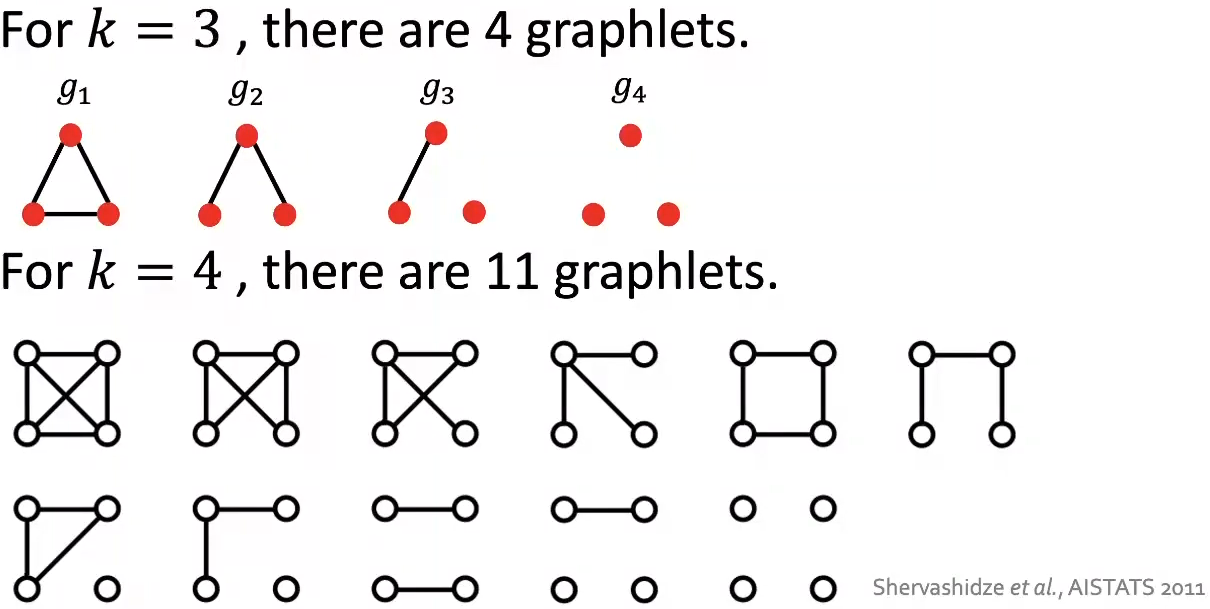

Given graph $G$, and a list $\mathcal{G}_k=(g_1,g_2,...,g_{n_k})$ of graphlets of size $k$, define the graphlet count vector $f_G\in\mathbb{R}^{n_k}$ as $(f_G)_i=\#(g_i\subseteq G)$ for $i=\{1,...,n_k\}$. Then for two graphs, $G$ and $G'$, the graphlet kernel is computed as $K(G,G')=f_G^Tf_{G'}$. To resolve skewness caused by $G$ and $G'$ having different sizes, normalization is done using $h_G=\frac{f_G}{\sum_{i=1}^{n_k}(f_G)_i}\rightarrow K(G,G')=h_G^Th_{G'}$

counting graphlets is expensive; taking $O(n^k)$ to count size-$k$ graphlets for a graph with size $n$ by enumeration, though if a graph's node degree is bounded by $d$ an $O(nd^{k-1})$ algorithm exists to count all the graphlets. This is unavoidable in the worst-case since subgraph isomorphism test (judging whether a graph is a subgraph of another graph) is an NP-hard problem.

#### Weisfeiler-Lehman (Color refinement) Kernel
This takes a different approach and can be thought of as a generalized version of Bag-of-Node-Degrees to multi-hop neighbourhoods; using the neighbourhood structure of the graph to iteratively enrich node vocabulary. 
- Note that all variants of color refinement (WL kernel included) are one-sided heuristic; meaning that if it is able to differciate between graphs then they are definitely different but the other direction does not hold.

Given a grpah $G$ with a set of nodes $V$, assign an initial color $c^{(0)}(v)$ to each node $v$. Then iteratively refine node colors by $$c^{(k+1)}(v)=\text{hash}(\text{concat}(c^{(k)}(v),\{c^{(k)}(u)\}_{u\in N(v)}))$$ After $K$ iterations of refinement, $c^{(k)}(v)$ summarizes the structure of the $K$-hop neighbourhood. The color count vector (feature vector) counts the number of colours present in the graph at each sep of the refinement:  $$\phi(G)=(g_{0}^{(0)},g_{1}^{(0)},...,g_{n_0}^{(0)},...,g_{0}^{(k)},...,g_{n_k}^{(k)}),\;\;\;\;\;g_{i}^{(j)}=\sum_{v\neq u,\;v,u \in V}\text{Indicator}(c^{(j)}(v)=c^{(j)}(u)=i)$$
The WL kernel value is computed by the inner product of the color count vector $K(G,G')=\phi(G)^T\phi(G')$

<table><tr><td>

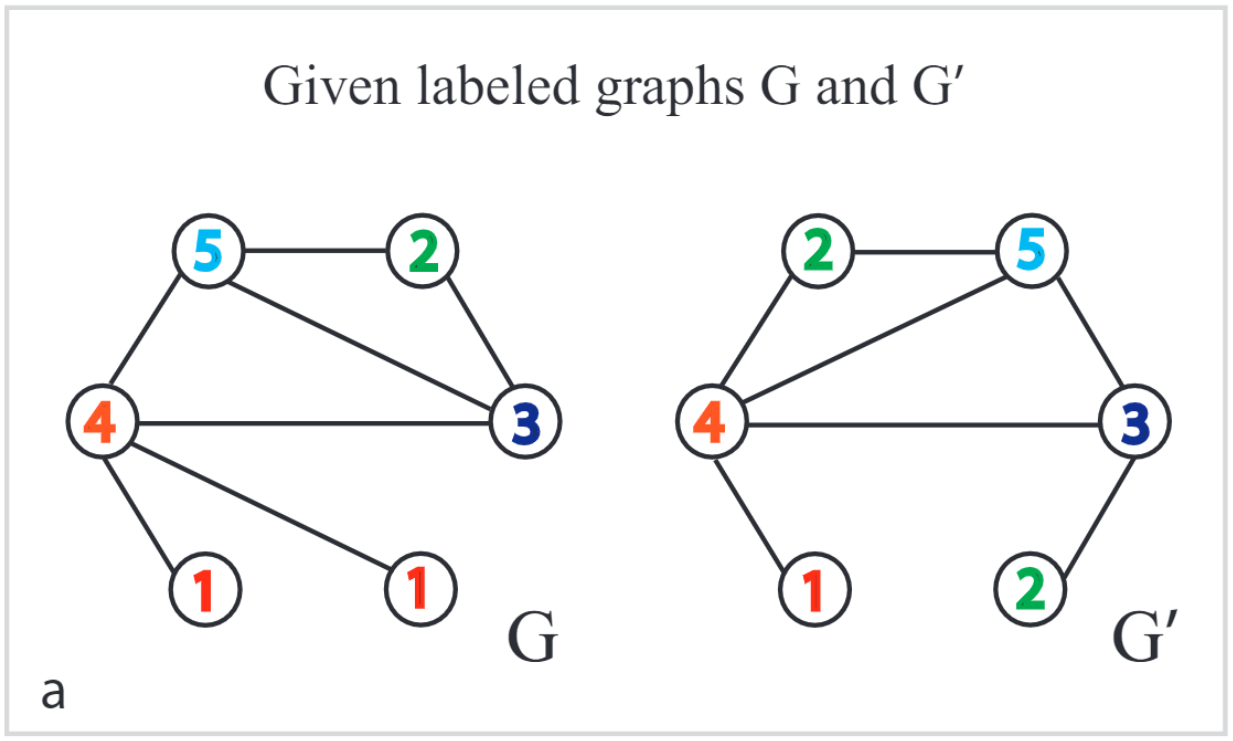
</td><td>

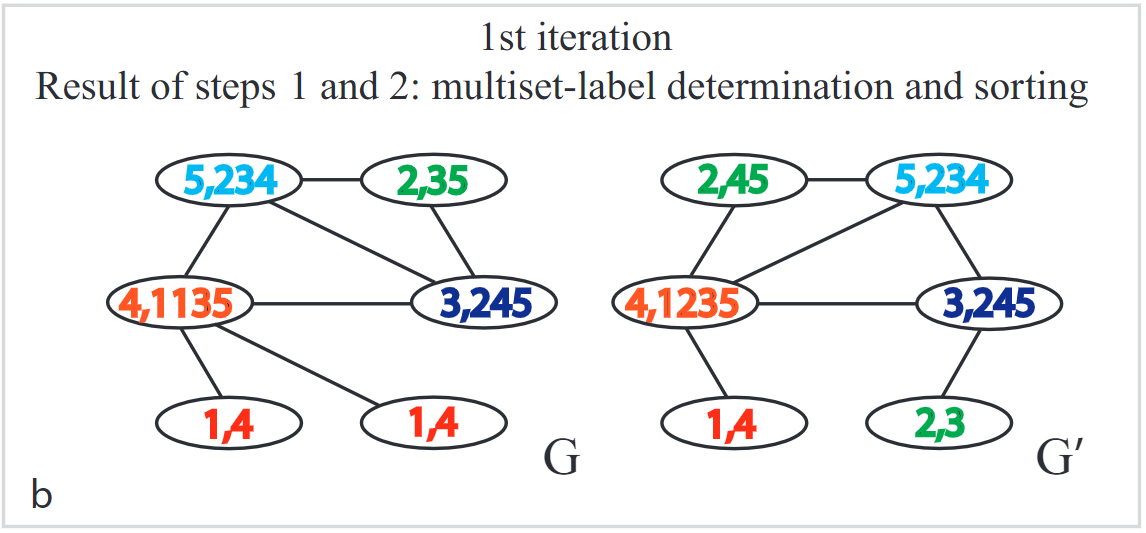
</td></tr>

<tr>
<td>

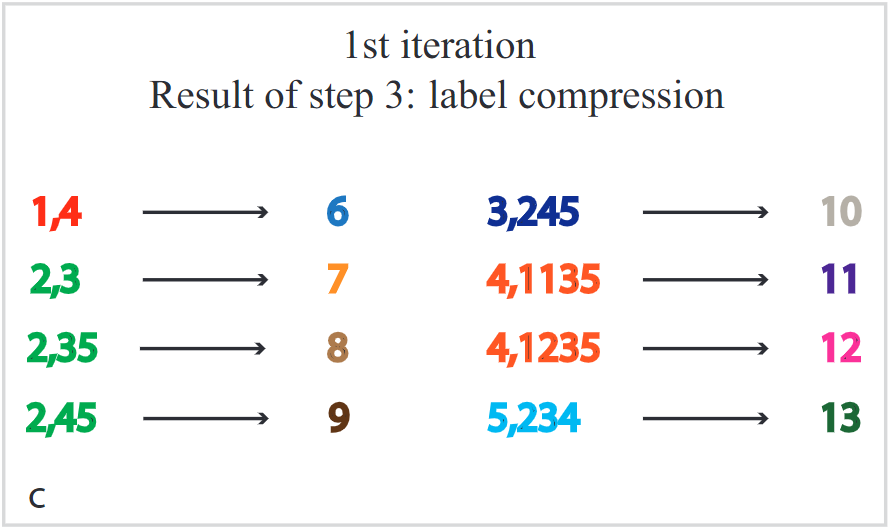
</td>
<td>

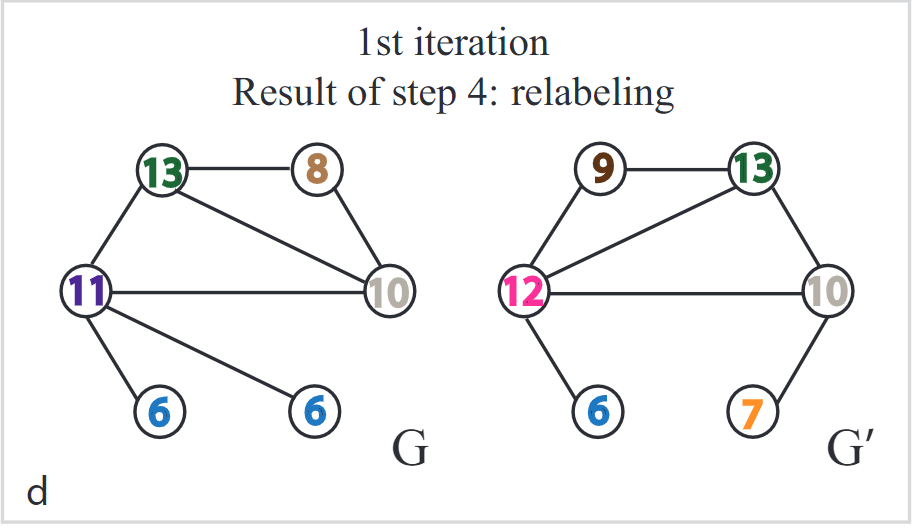
</td></tr></table>

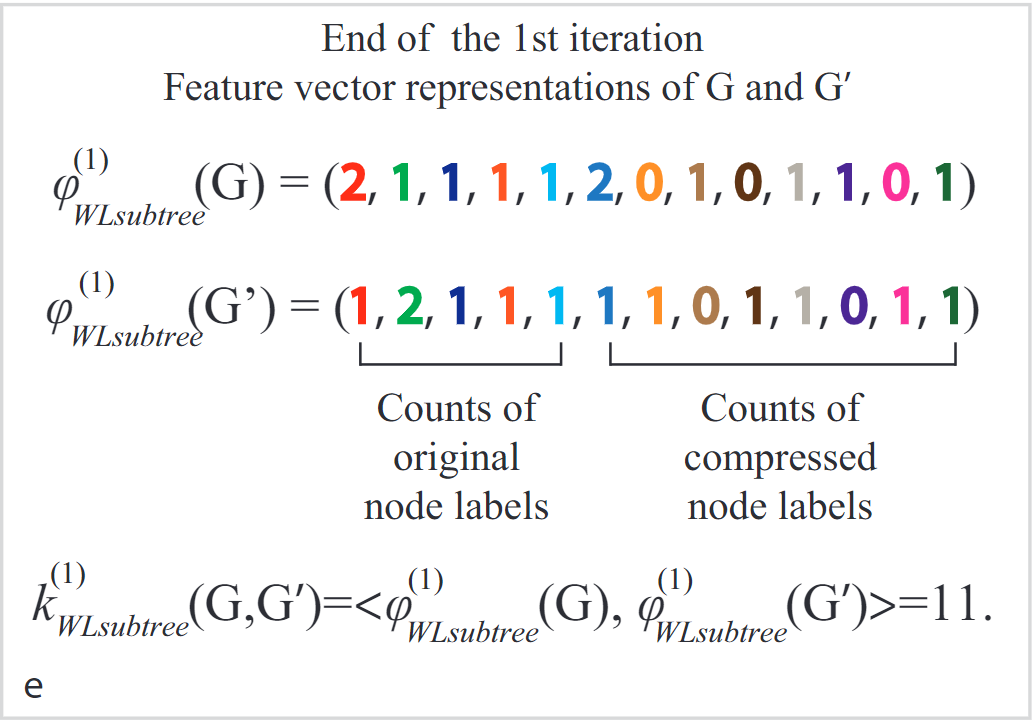

WL Kernel is computationally efficient, with a time complexity for colour refinement at each step being $O(E)$ (aggregating neighbouring colors); and when computing a kernel value, only colours that appeared in the two graphs need to be tracked and thus is $O(V)$, and so the total time complexity if $O(K(V+E))$.